In [3]:
'''from skimage import io
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import os
import numpy as np
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
import glob'''
''' From skimage.transform :
resize - rescale - rotate - hough_line - hough_circle - hough_cirlce_peaks
2. From skimage.morphology :
rectangle - disk - square - binary_erosion - binary_dilation - binary_closing - binary_opening - skeletonize - label


3. From skimage.feature
match_template
4. From skimage.filters
threshold_ostu, threshold_local
5. From skimage.measure
regionprops, label
6. matplotlib.patches: 
	all functions in module
    median = skimage.filters.median(image_array)

'''

' From skimage.transform :\nresize - rescale - rotate - hough_line - hough_circle - hough_cirlce_peaks\n2. From skimage.morphology :\nrectangle - disk - square - binary_erosion - binary_dilation - binary_closing - binary_opening - skeletonize - label\n\n\n3. From skimage.feature\nmatch_template\n4. From skimage.filters\nthreshold_ostu, threshold_local\n5. From skimage.measure\nregionprops, label\n6. matplotlib.patches: \n\tall functions in module\n'

In [1]:
from skimage import io ,transform ,feature,measure,filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2
import glob
from commonfunctions import *




In [2]:
def deskew(img):
    
    #GET HOUGH TRANFROM
    hspace, angles, distances=transform.hough_line(img)
    
    #Find the top (angles,d) pairs that have the highest count in the Hough matrix 
    accum, angles_2, dists = transform.hough_line_peaks(hspace, angles, distances)
  
    
    #Calulate the skew angle as an average of the angles
    skewAngle = np.rad2deg(np.mean(angles_2))
   
    #Rotate the image by – skew angle
    if(skewAngle<0):
        rotatedImg=transform.rotate(img, 90-abs(skewAngle),resize=True)
    else:
        rotatedImg=transform.rotate(img,skewAngle-90,resize=True)


        
    return rotatedImg

In [4]:
def to_binary(img,val):
    threshold = np.copy(img)
    threshold[threshold<val]=0
    threshold[threshold>=val]=1
    return threshold

In [5]:
def binarize(img):
    
    threshold = filters.threshold_otsu(img)
    img = to_binary(img,threshold)
    return img

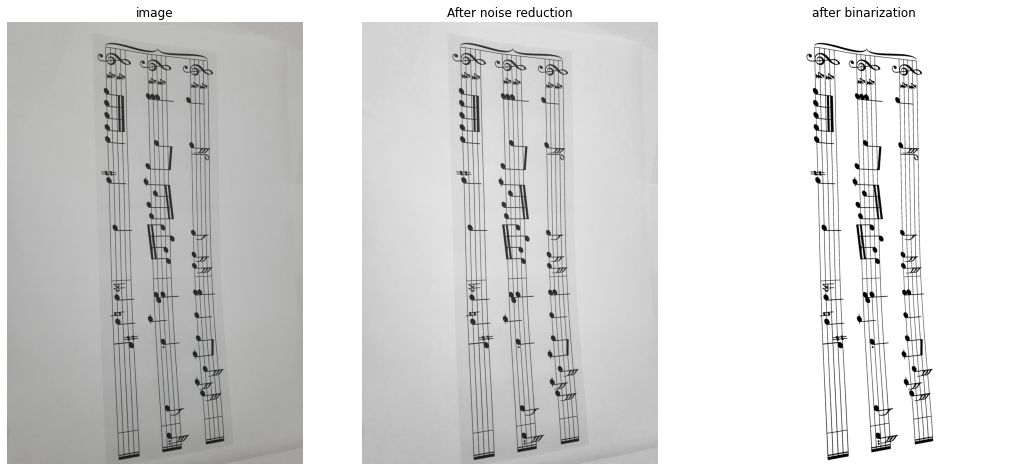

In [8]:
files = glob.glob ("./test-cases/21.jpg")
for file in files:
    img=io.imread(file)


    # Noise reduction
    gaussian = filters.gaussian(rgb2gray(img),sigma =0.6 )
    # Binarizing image using Otsu's Algorithm
    gaussianbinarized = binarize(gaussian)
    show_images([img,gaussian,gaussianbinarized],['image','After noise reduction','after binarization'])

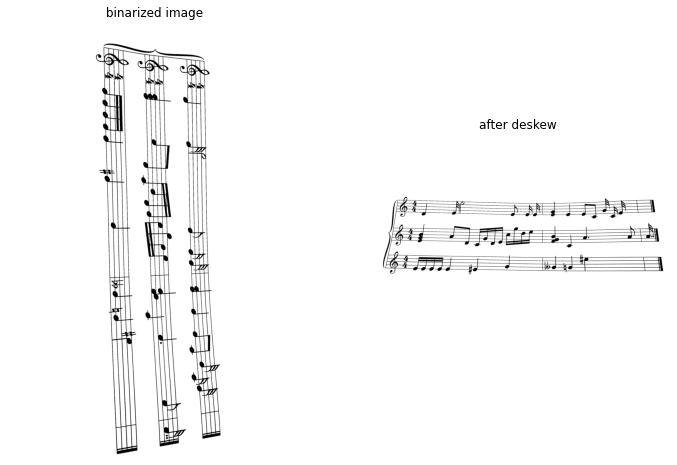

In [9]:
#deskweing Image 
deskewImage = deskew(1-gaussianbinarized)
show_images([gaussianbinarized,1-deskewImage],[' binarized image','after deskew'])

In [39]:
# Hough line to detect staff lines 
 
img = gaussianbinarized    

hspace, angles, distances=transform.hough_line(img)
# print(hspace)
accum, angles, dists = transform.hough_line_peaks(hspace, angles, distances)
# print(accum)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[812 812 811 811 810 808 808 808 808 808 807 806 802 801 800 794 790 789
 787 781 778 776 772 772 768 758 756 612 574 541 521 513 512 491 467 467
 458 442 440 435 434 433 433 433 432 429 427 421 420]
